# Aprendizaje Automático y Big Data

## Práctica 0: Vectorización

Guillermo García Patiño Lenza
Mario Quiñones Pérez

### Objetivos :

En esta práctica se pretende demostrar que el cálculo vectorizado que realiza Numpy es mucho más eficiente que realizar los mismos cálculos empleando bucles tradicionales de python. Para ello, se ha implementado el método Monte Carlo para calcular la integral definida de una función entre los dos puntos de ambas maneras y se han comparado los tiempos de ejecución obtenidos para diferentes cantidades de puntos aleatorios que se emplean para el cálculo

### Funciones Implementadas :

#### 1. Integra_mc :
Esta función recibe como parámetros: la expresión de la función a integrar (func), los dos puntos entre los que se quiere calcular la integral definida (a y b), y el número de puntos aleatorios (num_puntos) que se generarán para aproximar el cálculo. Después, calcula el máximo aproximado de la función recibida (max), genera num_puntos aleatorios en el intervalo (a,b) y otros num_puntos en el intervalo (0,max), calcula la imagen de los primeros num_puntos y obtiene el cociente (c) entre el número de pares (x,y) generados aleatoriamente que cumplen que y <= func(y) y el número de puntos total. Finalmente, la estimación de la integral se calcula como el producto A = c * (b-a) * max  

In [23]:
def integra_mc(func, a, b, num_puntos = 100):
    puntos = np.linspace(a,b,num_puntos)
    m = max(func(puntos))
    fxpuntos = func((np.random.randint(a, size = num_puntos)) + (b-a))
    ypuntos = np.random.randint(m, size=num_puntos)
    menores = ypuntos < fxpuntos
    por_debajo = sum(menores)
    return (por_debajo / num_puntos)*(b-a)*m

#### 2. Integra_mc1:
Esta función realiza el mismo cálculo que la anterior pero empleando bucles tradicionales de python

In [24]:
def integra_mc1(func, a, b, num_puntos = 10000):
    
    punto_f = func(a)
    por_debajo = 0
    
    for num in range(num_puntos):
        aux = a + (b-a)*num/num_puntos
        aux_f = func(aux)
        
        if aux_f > punto_f:
            punto_f = aux_f
            
    for num in range(num_puntos):
        fx = func((random.randrange(a)) + (b-a))
        y = random.randrange(int(punto_f))
        
        if y < fx:
            por_debajo = por_debajo + 1
        
    return (por_debajo / num_puntos)*(b-a)*punto_f  


#### 3. Toma_tiempos:
Esta función calcula la integral de la función f entre los puntos que recibe como parametro para varios valores de num_puntos, anotando el tiempo que tarda cada una de las ejecuciones y almacenándolo.

In [25]:
def toma_tiempos(f, a, b):
    t_bucles = []
    t_vectorizado = []
    tamanios = np.linspace(1,100000,100, dtype = int)
    for i in tamanios:
        tv = tiempo_vectorizado(f,a,b,i)
        tb = tiempo_bucles(f,a,b,i)
        t_bucles += [tb]
        t_vectorizado += [tv]
    return (t_bucles,t_vectorizado,tamanios)

#### 4. Main:
Se trata del punto de entrada al programa. Esta función se encarga de extraer los puntos entre los que se va a integrar la función desde los argumentos con los que se llama al programa, de generar la gráfica con los tiempos, y de guardarla en un png.

In [26]:
import sys
import numpy as np
import random
import time

import matplotlib.pyplot as plt

def func (x) :
    return -(x**2)+ 5*x + 5

def main():
    args = sys.argv
    # a, b = args[1], args[2]
    a, b = 2, 5
    t = toma_tiempos(func,a,b)
    #bucles, vectorizado, tamaños
    plt.figure()
    plt.scatter(t[2],t[0], c = 'red', label = 'bucle')
    plt.scatter(t[2],t[1], c = 'blue', label = 'vectorizado')
    plt.legend()
    plt.show()
    plt.savefig('tiempos2.png')

### Conclusiones:

Después de ejecutar el código anterior, hemos obtenido la siguiente gráfica, que muestra como claramente es más eficiente emplear Numpy para este tipo de cálculos que hacerlos con bucles tradicionales. Para generar la gráfica se han empleado 1.000 valores diferentes entre 1 y 1.000.000 para ambos métodos de cálculo.

Como última nota hay que destacar que, aunque parece que la diferencia en eficiencia no es tan notable, para casos más grandes que estos la diferencia debería notarse mucho más tanto en la gráfica como en el tiempo real de ejecución

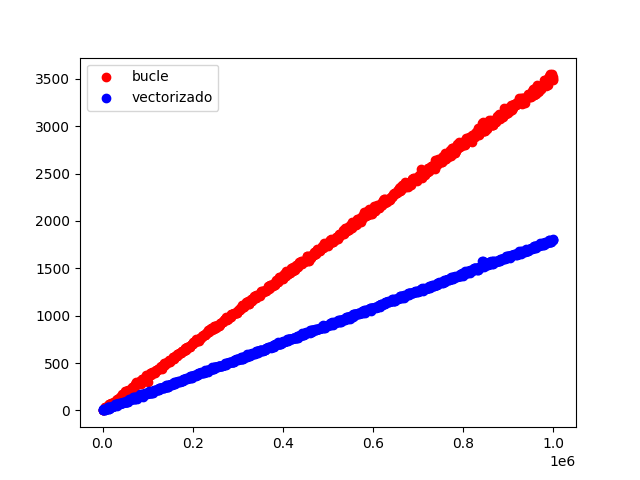